# EDA

In [8]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("datasetRAW.csv", sep = ",")


## Verificação de Tipo de valores, existência de valores Nulos ou Duplicados

In [8]:
df.dtypes
#df.isna().sum()

Unnamed: 0                                          int64
Marital status                                     object
Application mode                                   object
Application order                                   int64
Course                                             object
Daytime/evening attendance                         object
Previous qualification                             object
Nacionality                                        object
Mother's qualification                             object
Father's qualification                             object
Mother's occupation                                object
Father's occupation                                object
Displaced                                          object
Educational special needs                          object
Debtor                                             object
Tuition fees up to date                             int64
Gender                                             object
Scholarship ho

In [ ]:
duplicadas = df.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicadas}")

Número de linhas duplicadas: 0


# Conhecimento de Features

<function matplotlib.pyplot.show(close=None, block=None)>

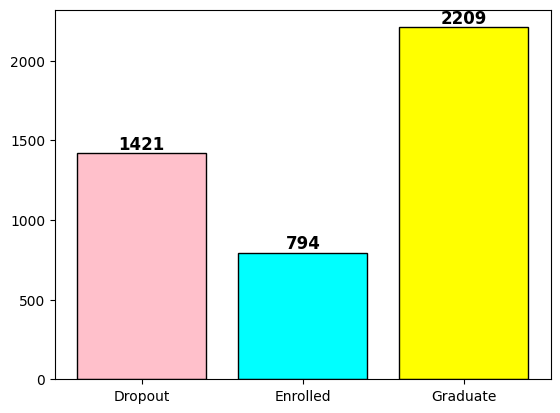

In [3]:
abandon_count = sum(df["Target"]=="Dropout")
enrolled_count =sum(df["Target"]=="Enrolled")
grad_count = sum(df["Target"]=="Graduate")
vals = [abandon_count, enrolled_count, grad_count]

categorias = ["Dropout", "Enrolled", "Graduate"]

plot = plt.bar(categorias, vals, color=["pink", "cyan", "yellow"], ec="black")

# Adicionando os valores acima das barras
for bar in plot:
    plt.text(bar.get_x() + bar.get_width()/2,  # Posição X (meio da barra)
             bar.get_height(),                 # Posição Y (topo da barra)
             str(bar.get_height()),            # Texto (o valor da barra)
             ha="center",                      # Centralizar horizontalmente
             va="bottom",                      # Alinhar na parte inferior do texto
             fontsize=12,                      # Tamanho da fonte
             fontweight="bold") 
    
plt.show

Demonstração de grande Disparidade entre valores negativos (Graduate) e valores positivos (Dropout)

## Demontração de Variáveis independentes Em Relação às variáveis Target

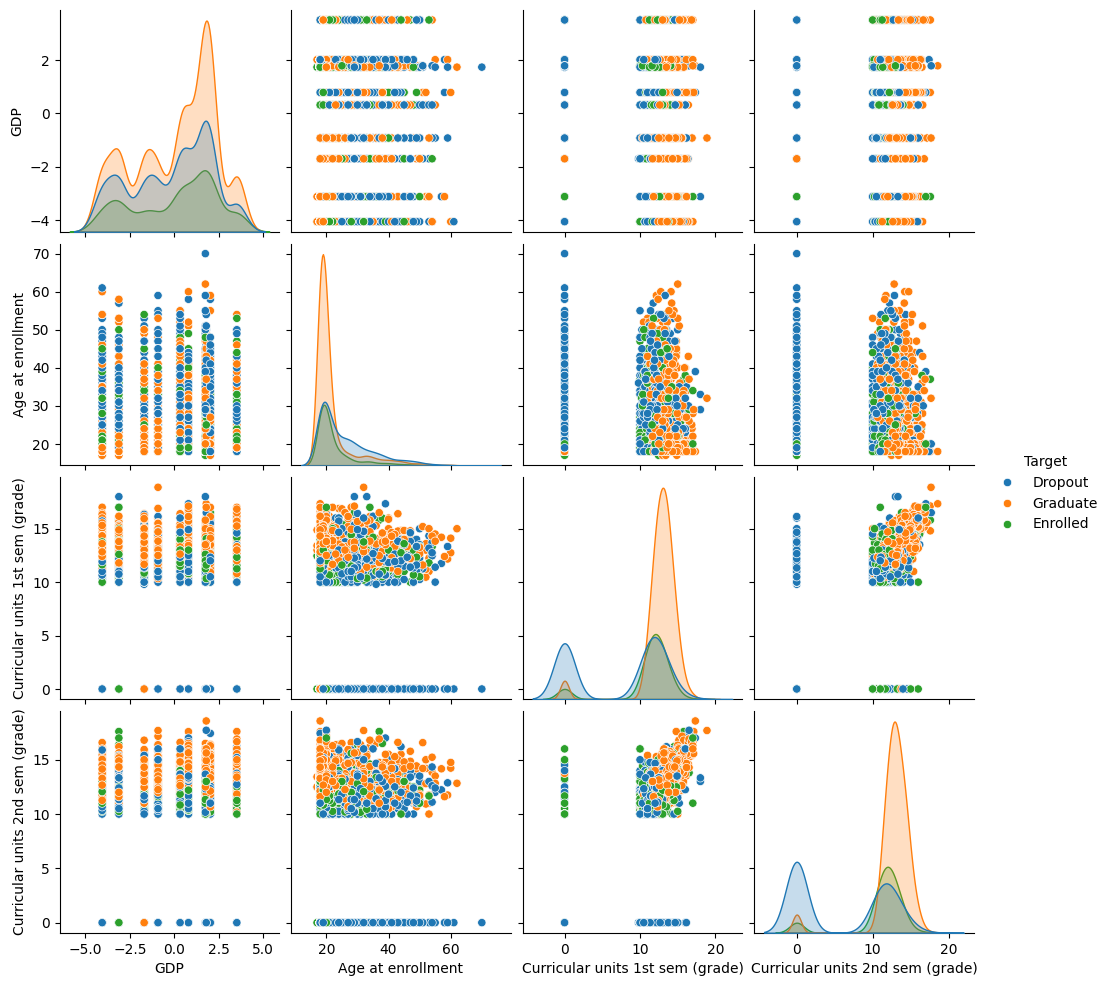

In [3]:
selected_features = ['GDP', 'Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Target']
sns.pairplot(df[selected_features], hue='Target')
plt.show()

Media = 23.265144665461122 Mediana = 20.0 


Text(0.5, 1.0, 'Distribution of Age')

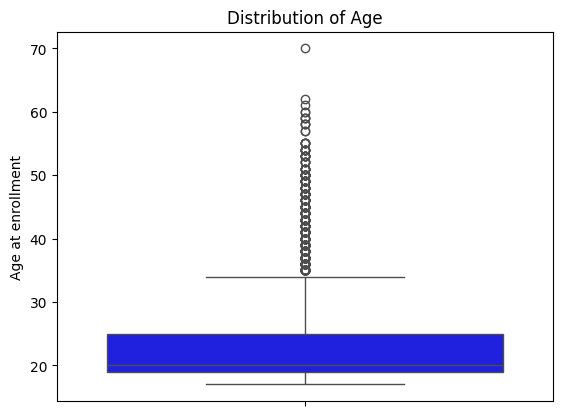

In [ ]:
med =df["Age at enrollment"].mean()
mediana = df["Age at enrollment"].median()
print(f"Media = {med} Mediana = {mediana} ")
sns.boxplot(df["Age at enrollment"], color='blue')
plt.title("Distribution of Age")

<function matplotlib.pyplot.show(close=None, block=None)>

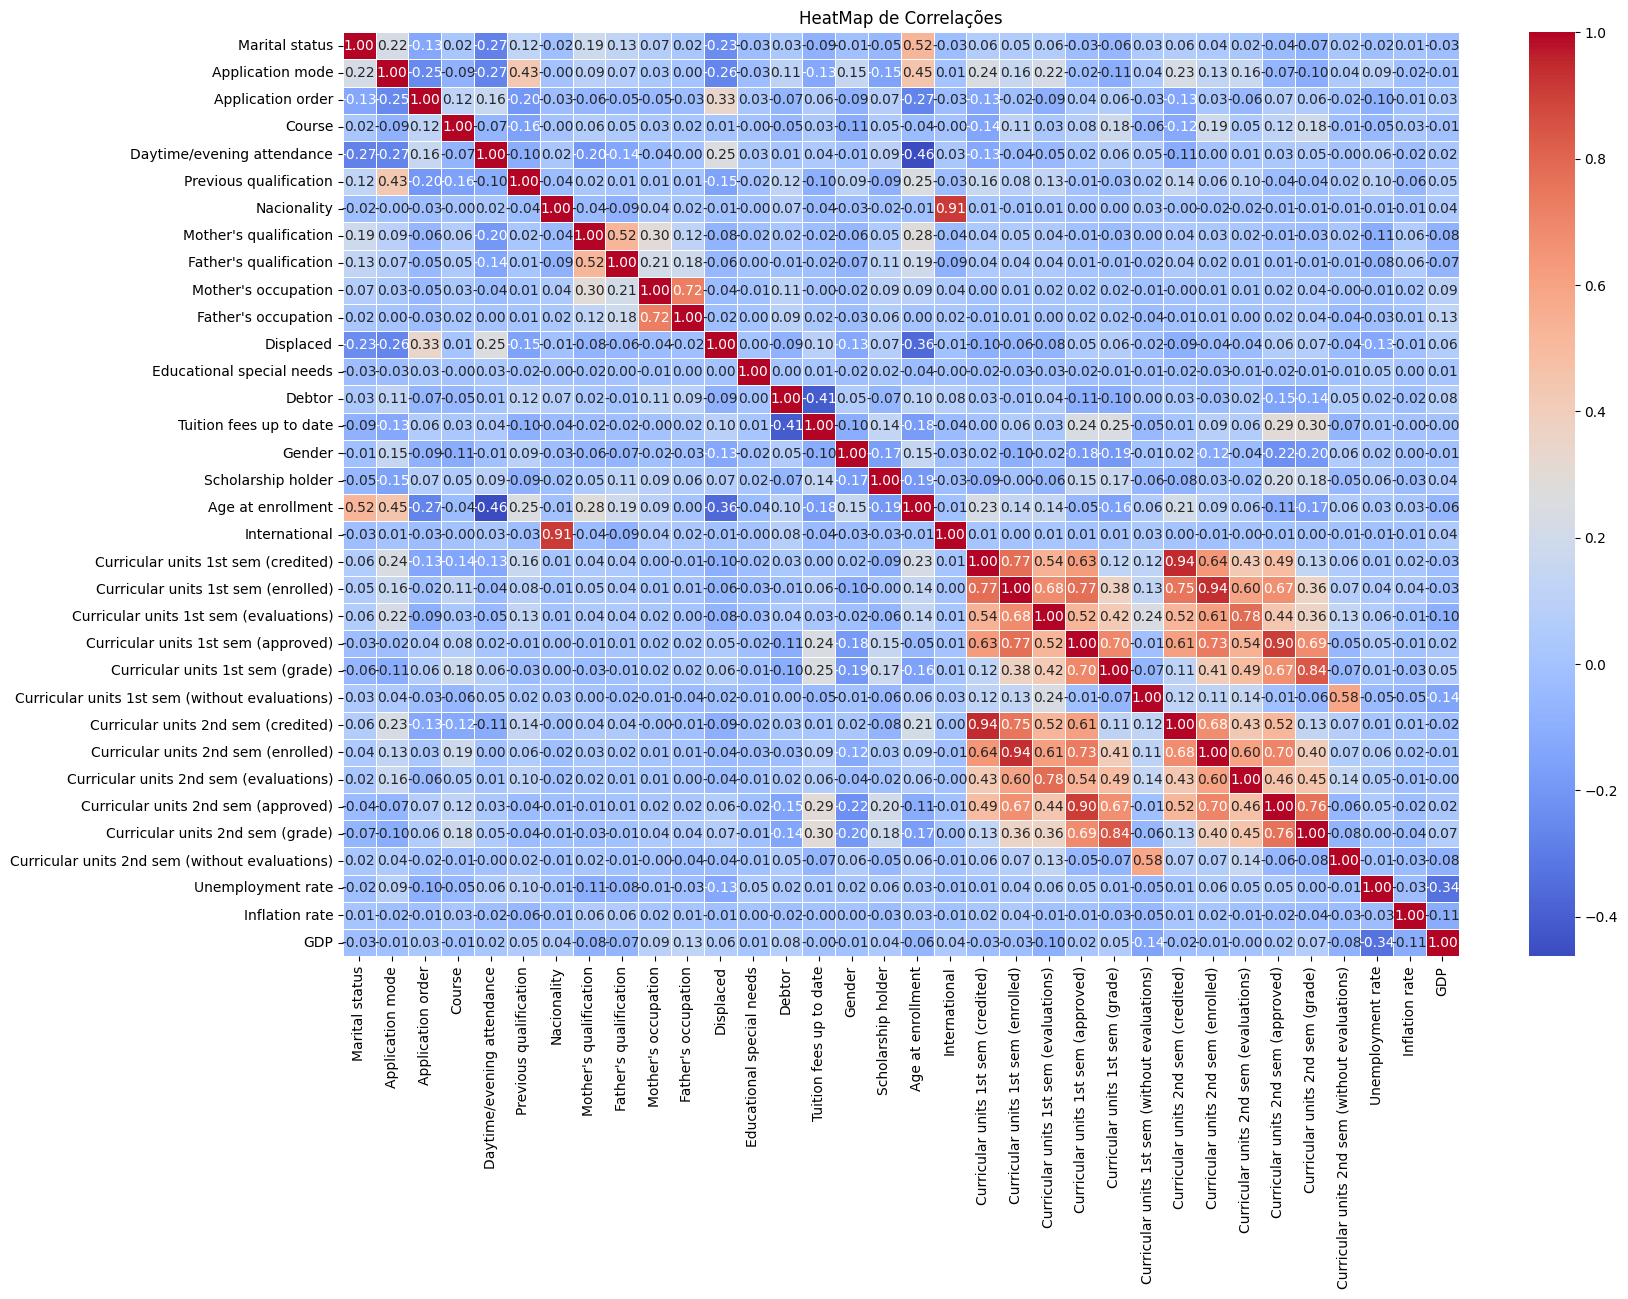

In [7]:
df2 = pd.read_csv("datasetRAW.csv", sep=",")
df_numerico = df2.select_dtypes(include=["number"])


correlation_matrix = df_numerico.corr()
plt.figure(figsize=(18,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("HeatMap de Correlações")
plt.show

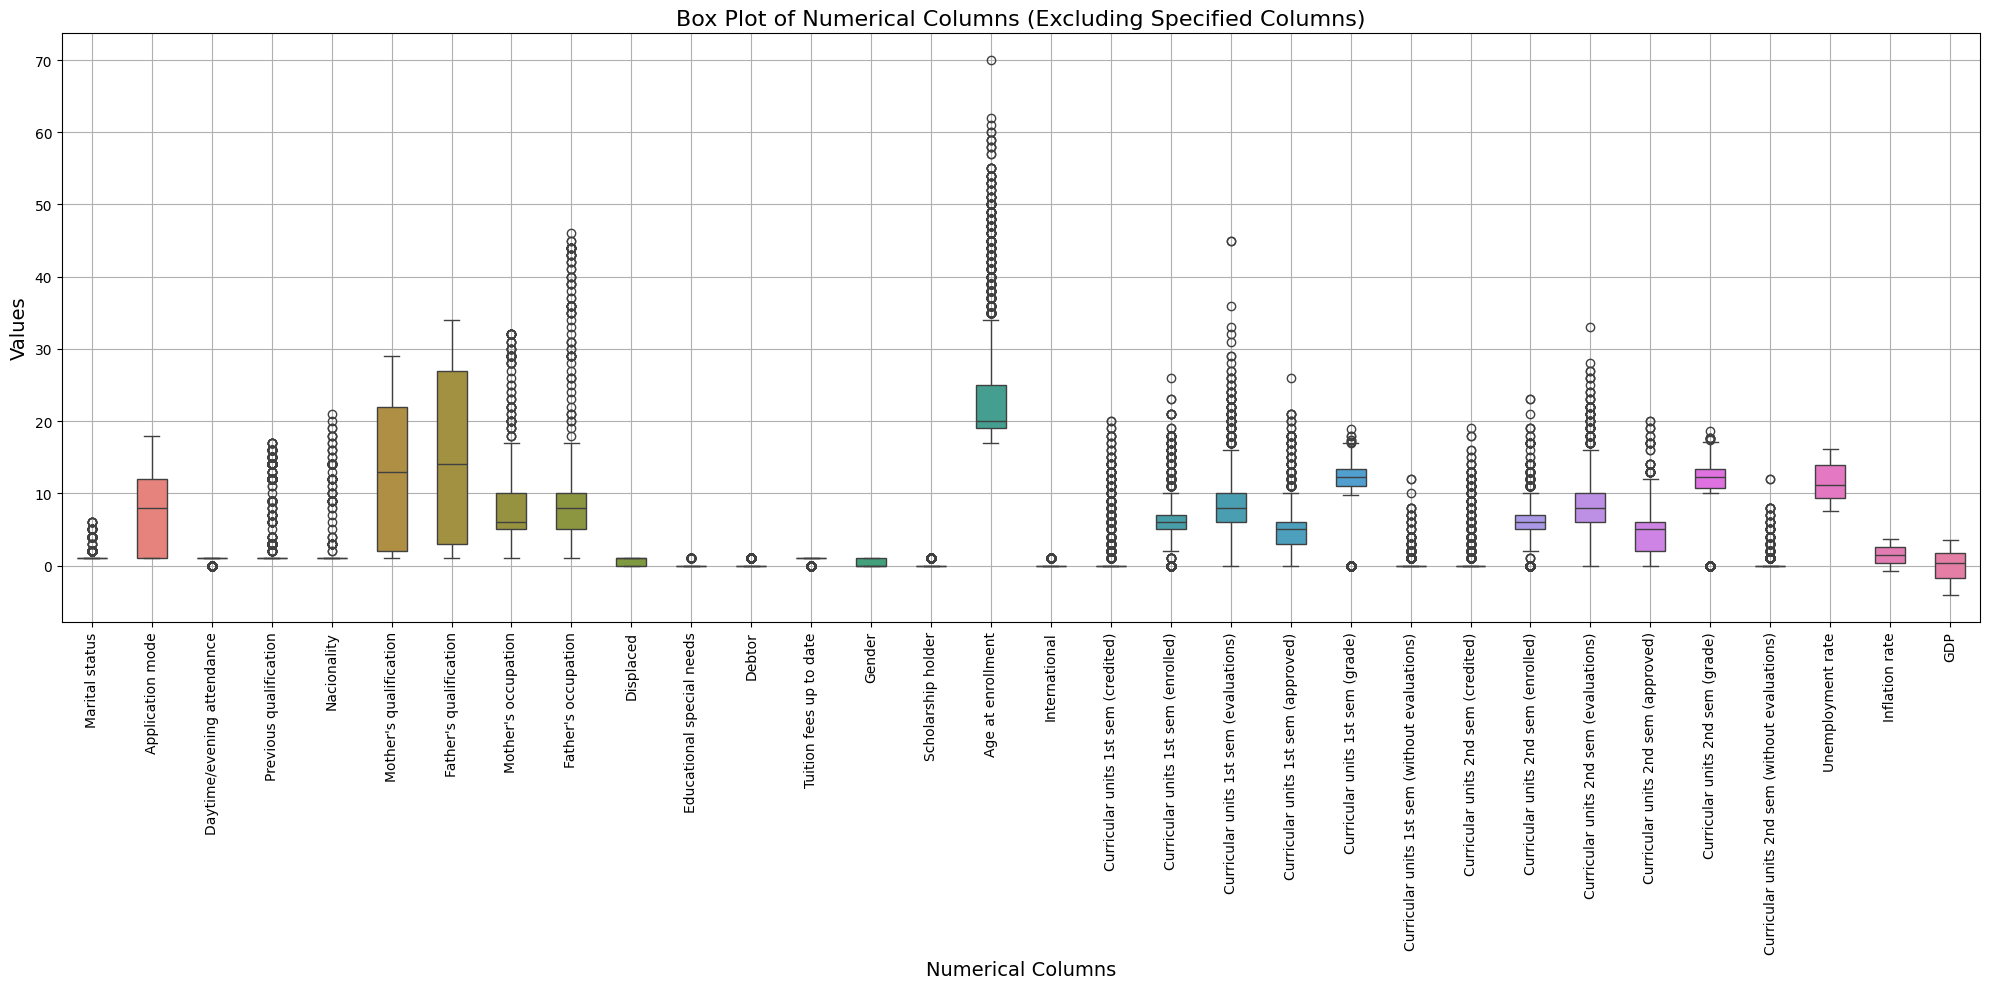

In [10]:
exclude_columns = ['Application order', 'Course']
numerical_cols = df.select_dtypes(include=['number']).drop(columns=exclude_columns).columns
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[numerical_cols], orient='v', width=0.5)
plt.title('Box Plot of Numerical Columns (Excluding Specified Columns)', fontsize=16)
plt.xlabel('Numerical Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparação da variavel objetivo com o nível de qualificação dos Pais

In [12]:
#Niveis de ensino Superior
higher_education_levels = ['Higher Education—bachelor’s degree', 'Higher Education—degree', 'Higher Education—master’s degree', 'Higher Education—doctorate', 'Technological specialization course', 'Specialized higher studies course', 'Professional higher technical course']

#Nova coluna 'parents_higher_ed' (1 se pelo menos um dos pais tem ensino superior)
df['parents_higher_ed'] = df["Father's qualification"].isin(higher_education_levels) | df["Mother's qualification"].isin(higher_education_levels)

#Converter bools para 1 ou 0
df['parents_higher_ed'] = df['parents_higher_ed'].astype(int)

In [8]:

#Criação tabela abandono
df['abandoned'] = np.where(df['Target'] == 'Dropout', 1, 0)

In [6]:
#Cross-Tabulation
cross_tabulation = pd.crosstab(df["abandoned"], df["parents_higher_ed"])
print(cross_tabulation)

parents_higher_ed     0    1
abandoned                   
0                  2471  532
1                  1187  234


### Teste para quando ambos os pais finalizar o ensino superior

In [14]:
#Nova coluna 'parents_higher_ed' (1 quando ambos tem ensino superior)
df['both_parents_higher_ed'] = df["Father's qualification"].isin(higher_education_levels) & df["Mother's qualification"].isin(higher_education_levels)

#Converter bools para 1 ou 0
df['both_parents_higher_ed'] = df['both_parents_higher_ed'].astype(int)

In [11]:
#Cross-Tabulation
cross_tabulation2 = pd.crosstab(df["abandoned"], df["both_parents_higher_ed"])
print(cross_tabulation2)

both_parents_higher_ed     0    1
abandoned                        
0                       2848  155
1                       1344   77


## Teste de relação entre ordem de Colocação e variavel objetivo

In [4]:
#Nova coluna 'parents_higher_ed' (1 se pelo menos um dos pais tem ensino superior)
df['parents_higher_ed'] = df["Father's qualification"].isin(higher_education_levels) | df["Mother's qualification"].isin(higher_education_levels)

#Converter bools para 1 ou 0
df['parents_higher_ed'] = df['parents_higher_ed'].astype(int)

#Criação tabela abandono
df['abandoned'] = np.where(df['Target'] == 'Dropout', 1, 0)

#Cross-Tabulation
cross_tabulation = pd.crosstab(df["abandoned"], df["parents_higher_ed"])
print(cross_tabulation)

chi2, p, dof, expected = chi2_contingency(cross_tabulation)

print(f"Qui-Quadrado: {chi2}, p-valor: {p}")

parents_higher_ed     0    1
abandoned                   
0                  2471  532
1                  1187  234
Qui-Quadrado: 0.9645413161245024, p-valor: 0.32604534248007


### Colocação nas 3 últimas opções

In [9]:
df["last_Opt"] = df["Application order"].isin([4,5,6])
df["last_Opt"] = df["last_Opt"].astype(int)

cross_tabulation4 = pd.crosstab(df["abandoned"], df["last_Opt"])
print(cross_tabulation4)

chi2, p, dof, expected = chi2_contingency(cross_tabulation4)

print(f"Qui-Quadrado: {chi2}, p-valor: {p}")

last_Opt      0    1
abandoned           
0          2605  398
1          1279  142
Qui-Quadrado: 9.26672997130045, p-valor: 0.0023335395867080657


# Não ser solteiro

In [9]:
df["Not_Single"] = df["Marital status"]!= "Single"
df["Not_Single"] = df["Not_Single"].astype(int)

cross_tabulation5 = pd.crosstab(df["abandoned"], df["Not_Single"])
print(cross_tabulation5)

chi5, p5, dof, expected = chi2_contingency(cross_tabulation4)

print(f"Qui-Quadrado: {chi5}, p-valor: {p5}")

Not_Single     0    1
abandoned            
0           2735  268
1           1184  237
Qui-Quadrado: 4.032044994347059, p-valor: 0.04464379456777537


## Teste de Relação entre Abandono e Idade acima da Mediana

In [6]:
df["Age_over_median"] = df["Age at enrollment"]>20
df["Age_over_median"] = df["Age_over_median"].astype(int)

cross_tabulation6 = pd.crosstab(df["abandoned"], df["Age_over_median"])
print(cross_tabulation6)

chi6, p6, dof, expected = chi2_contingency(cross_tabulation6)

print(f"Qui-Quadrado: {chi6}, p-valor: {p6}")

Age_over_median     0    1
abandoned                 
0                2009  994
1                 542  879
Qui-Quadrado: 325.5778907945476, p-valor: 8.829743341512407e-73


## Pais com educação superior + aluno deslocado

In [16]:
df["Displaced"] = df["Displaced"].map({"Yes":1, "No":0})
df["parent_higher_ed_and_displaced"] = (df['both_parents_higher_ed'] & df["Displaced"])
df["parent_higher_ed_and_displaced"] = df["parent_higher_ed_and_displaced"].astype(int)

cross_tabulation7 = pd.crosstab(df["abandoned"], df["parent_higher_ed_and_displaced"])
print(cross_tabulation7)

chi7, p7, dof, expected = chi2_contingency(cross_tabulation7)
print(f"Qui-Quadrado: {chi7}, p-valor: {p7}")

parent_higher_ed_and_displaced     0   1
abandoned                               
0                               2922  81
1                               1377  44
Qui-Quadrado: 0.42366837411638647, p-valor: 0.5151122494193413


In [17]:
df["AtleastOneParent_higher_ed_and_displaced"] = (df['parents_higher_ed'] & df["Displaced"])
df["AtleastOneParent_higher_ed_and_displaced"] = df["AtleastOneParent_higher_ed_and_displaced"].astype(int)

cross_tabulation8 = pd.crosstab(df["abandoned"], df["AtleastOneParent_higher_ed_and_displaced"])
print(cross_tabulation8)

chi8, p8, dof, expected = chi2_contingency(cross_tabulation8)

print(f"Qui-Quadrado: {chi8}, p-valor: {p8}")

AtleastOneParent_higher_ed_and_displaced     0    1
abandoned                                          
0                                         2695  308
1                                         1296  125
Qui-Quadrado: 2.165560838292574, p-valor: 0.14113312311347068


## Teste SHAP com Regressão Logistica

In [3]:
df = df[df['Target'] != 'Enrolled']